In [41]:
import os
import shutil
import random
import PIL
import cv2
import pathlib
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
train_data_dir="DL-datasets/cats_and_dogs_filtered/train"

In [18]:
train_data_dir = pathlib.Path(train_data_dir)

In [16]:
test_data_dir="DL-datasets/cats_and_dogs_filtered/validation"

In [19]:
test_data_dir = pathlib.Path(test_data_dir)

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(180,180),
    batch_size=32

)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [21]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    
    test_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(180,180),
    batch_size=32

)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [22]:
class_name = train_ds.class_names
print(class_name)

['cats', 'dogs']


In [23]:
class_name2 = test_ds.class_names
print(class_name2)

['cats', 'dogs']


In [24]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

resnet_model = Sequential()


pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(180,180,3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512,activation='relu'))
resnet_model.add(layers.Dense(2,activation='softmax'))

In [25]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [26]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history = resnet_model.fit(train_ds,validation_data=test_ds,epochs=5)

Epoch 1/5
50/50 [==============================] - 186s 4s/step - loss: 0.2410 - accuracy: 0.9306 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 2/5
50/50 [==============================] - 147s 3s/step - loss: 0.0586 - accuracy: 0.9750 - val_loss: 0.0891 - val_accuracy: 0.9700
Epoch 3/5
50/50 [==============================] - 156s 3s/step - loss: 0.0166 - accuracy: 0.9937 - val_loss: 0.0687 - val_accuracy: 0.9850
Epoch 4/5
50/50 [==============================] - 152s 3s/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0786 - val_accuracy: 0.9750
Epoch 5/5
50/50 [==============================] - 153s 3s/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0780 - val_accuracy: 0.9750


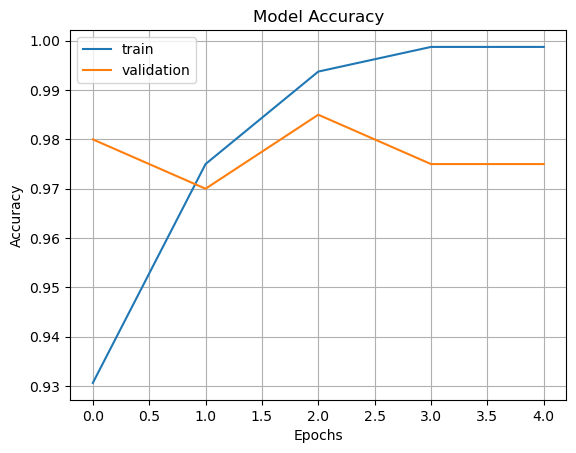

In [28]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axis(ymin=0.4,ymax=0.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

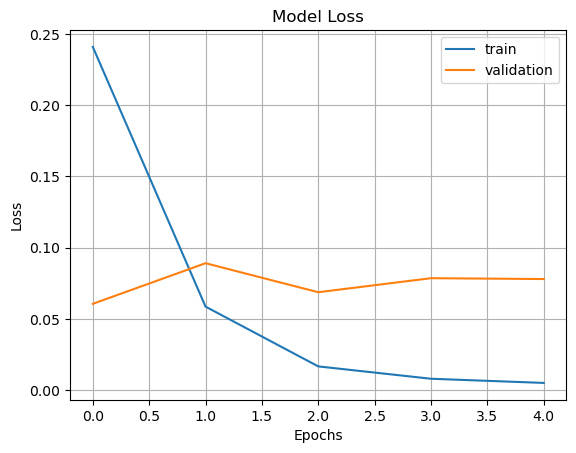

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.4,ymax=0.1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [32]:
dogs = list(test_data_dir.glob('dogs/*'))

In [33]:
cats = list(test_data_dir.glob('cats/*'))

In [34]:
import random
n_dog = random.randint(0,len(dogs))
n_cat = random.randint(0,len(cats))

In [36]:
image_dog = cv2.imread(str(dogs[n_dog]))
image_cat = cv2.imread(str(cats[n_cat]))

In [37]:
image_dog = cv2.resize(image_dog,(180,180))
image_cat = cv2.resize(image_cat,(180,180))

1/1 [==============================] - 4s 4s/step
Predicted Class :-  dogs


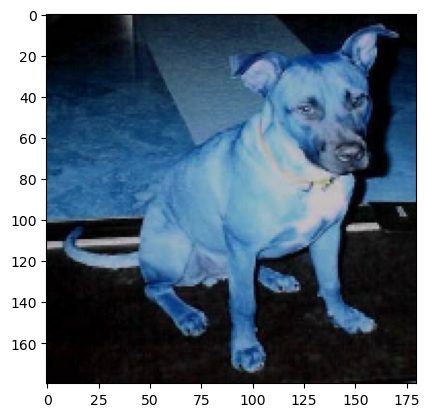

In [42]:
plt.imshow(image_dog)

image_dog = np.expand_dims(image_dog,axis=0)

pred_dog = resnet_model.predict(image_dog)

print("Predicted Class :- ",class_name[np.argmax(pred_dog)])

In [ ]:
plt.imshow(image_cat)

image_cat = np.expand_dims(image_cat,axis=0)

pred_cat = resnet_model.predict(image_cat)

print("Predicted Class :- ",class_name[np.argmax(pred_cat)])